# Case

Elaborar uma visualização, usando pela menos uma base do nosso datalake. Sugerimos uma das seguintes bases:
- Penn World Tables (PWT)
- Sistema de Informações sobre Mortalidade (SIM)
- Censo Agropecuário

🚨 A visualização deverá ser realizada seguindo as seguintes regras:
- Utilizar as bases do nosso datalake;
- Utilizar o pacote basedosdados em Python;
- Subir a visualização e todo código em Python em um repositório público no seu Github;
- Preencher esse formulário com o link do repositório e o seu CV em pdf até a data limite


# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import basedosdados as bd
import seaborn as sns

In [24]:
#Lendo o arquivo
df = bd.read_sql(
    '''
    SELECT * FROM `basedosdados.br_ggb_relatorio_lgbtqi.raca_cor` LIMIT 100
    ''',
    billing_project_id='desafio-base-de-dados'
)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 79.06rows/s]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ano                    36 non-null     object 
 1   raca_cor               36 non-null     object 
 2   homicidios             23 non-null     Int64  
 3   prop_homicidios_total  23 non-null     float64
dtypes: Int64(1), float64(1), object(2)
memory usage: 1.3+ KB


In [5]:
len(df.index)

36

In [6]:
colunas_selecionadas = ['raca_cor', 'prop_homicidios_total']
df_selecao = df.filter(items=colunas_selecionadas)
df_selecao.head()

,raca_cor,prop_homicidios_total
0,Branca,36.78
1,Parda,27.35
2,Preta,9.73
3,Não Identificado,26.14
4,Branca,58.40


In [7]:
df.groupby('raca_cor').count()

,ano,homicidios,prop_homicidios_total
raca_cor,,,
Branca,9,6,6
Não Identificado,9,5,5
Parda,9,6,6
Preta,9,6,6


In [8]:
#somda da coluna homicidios
df['homicidios'].sum()

2088

In [9]:
#soma da coluna prop_homicidios_total
df['prop_homicidios_total'].sum()

618.05

In [18]:
print(df.isna().sum()) #mostrando a soma dos valores vazios em cada coluna. Temos muitos valores faltantes!

ano                       0
raca_cor                  0
homicidios               13
prop_homicidios_total    13
dtype: int64


In [19]:
df  = df.dropna(how="any", axis=0) #Eliminando linhas que contem itens vazios

In [20]:
print(df.isna().sum()) #agora sem dados faltantes

ano                      0
raca_cor                 0
homicidios               0
prop_homicidios_total    0
dtype: int64


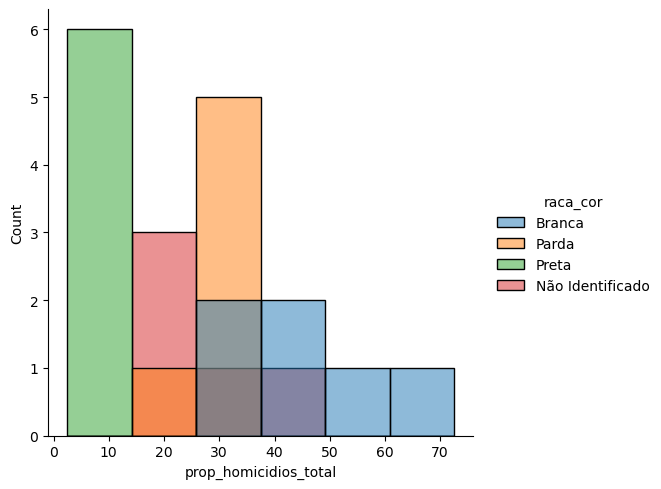

In [23]:
fig = sns.displot(data = df,  x = "prop_homicidios_total", hue= "raca_cor")
plt.show(fig)
#aqui podemos constatar que o número de pessoas de cor preta foi maior